# Credit Card Fraud Detection

In [1]:
#Import python modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

print('Modules imported successfully!')

Modules imported successfully!


In [2]:
#Loading the datasets
df = pd.read_csv('creditcard.csv')

print('Dataset Loaded Successfully')

Dataset Loaded Successfully


In [3]:
#Checking the shape of dataset
df.shape

(284807, 31)

In [4]:
#First 5 rows
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#Statistical data about dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [6]:
#Checking the data type of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#Checking unique values
df.apply(lambda x: len(x.unique()))

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

In [8]:
#Checking for null values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
#Checking duplicate rows
df.duplicated().sum()

1081

In [10]:
#Dropping the duplicate rows
df.drop_duplicates(inplace=True)

In [11]:
#Checking dataset before moving to next part
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.Class.value_counts()

0    283253
1       473
Name: Class, dtype: int64

- **473 credit card fraud transactions.**

In [13]:
X = df.drop(columns='Class')
y = df['Class']

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/5, random_state=42)

## Data Modelling

In [16]:
from sklearn.metrics import accuracy_score

### Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train, y_train)

LogisticRegression()

In [18]:
y_pred = LR.predict(X_test)

In [19]:
LR_score = accuracy_score(y_test, y_pred)

In [20]:
print("Accuracy Score: ",round(LR_score*100,2))

Accuracy Score:  99.9


### Linear Discriminant Analysis

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA = LinearDiscriminantAnalysis()
LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [22]:
y_pred = LDA.predict(X_test)

In [23]:
LDA_score = accuracy_score(y_test, y_pred)

In [24]:
print("Accuracy Score: ",round(LDA_score*100,2))

Accuracy Score:  99.94


### Gaussian Naive Bayes

In [25]:
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB()
GNB.fit(X_train, y_train)

GaussianNB()

In [26]:
y_pred = GNB.predict(X_test)

In [27]:
GNB_score = accuracy_score(y_test, y_pred)

In [28]:
print("Accuracy Score: ",round(GNB_score*100,2))

Accuracy Score:  99.29


### Decision Tree

In [29]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
y_pred = DT.predict(X_test)

In [31]:
DT_score = accuracy_score(y_test, y_pred)

In [32]:
print("Accuracy Score: ",round(DT_score*100,2))

Accuracy Score:  99.9


### Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
y_pred = RF.predict(X_test)

In [35]:
RF_score = accuracy_score(y_test, y_pred)

In [36]:
print("Accuracy Score: ",round(RF_score*100,2))

Accuracy Score:  99.96


### Support Vector Machines

In [37]:
from sklearn.svm import SVC
SVM = SVC()
SVM.fit(X_train, y_train)

SVC()

In [38]:
y_pred = SVM.predict(X_test)

In [39]:
SVM_score = accuracy_score(y_test, y_pred)

In [40]:
print("Accuracy Score: ",round(SVM_score*100,2))

Accuracy Score:  99.84


### k-Nearest Neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

KNeighborsClassifier()

In [42]:
y_pred = KNN.predict(X_test)

In [43]:
KNN_score = accuracy_score(y_test, y_pred)

In [44]:
print("Accuracy Score: ",round(KNN_score*100,2))

Accuracy Score:  99.85


### Light Gradient Boosting Machine

In [45]:
import lightgbm as gbm
LGBM = gbm.LGBMClassifier()
LGBM.fit(X_train, y_train)

LGBMClassifier()

In [46]:
y_pred = LGBM.predict(X_test)

In [47]:
LGBM_score = accuracy_score(y_test, y_pred)

In [48]:
print("Accuracy Score: ",round(LGBM_score*100,2))

Accuracy Score:  99.45


### XGBoost

In [49]:
from xgboost import XGBClassifier
XGB = XGBClassifier(eval_metric='mlogloss')
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [50]:
y_pred = XGB.predict(X_test)

In [51]:
XGB_score = accuracy_score(y_test, y_pred)

In [52]:
print("Accuracy Score: ",round(XGB_score*100,2))

Accuracy Score:  99.96


## Evaluation

In [53]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Linear Discriminant Analysis','Naive Bayes', 'Decision Tree', 'Random Forest', 'Support Vector Machines', 
              'K - Nearest Neighbors', 'Light Gradient Boosting Machine', 'XGBoost Classifier'],
    'Score': [LR_score, LDA_score, GNB_score, DT_score, RF_score, SVM_score, KNN_score, LGBM_score, XGB_score]})

models.sort_values(by='Score', ascending=False)

,Model,Score
8,XGBoost Classifier,0.999577
4,Random Forest,0.999559
1,Linear Discriminant Analysis,0.999418
0,Logistic Regression,0.998996
3,Decision Tree,0.998996
6,K - Nearest Neighbors,0.998484
5,Support Vector Machines,0.998414
7,Light Gradient Boosting Machine,0.994467
2,Naive Bayes,0.992863


In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
cnf = confusion_matrix(y_test, y_pred)
cnf

array([[56654,     2],
       [   22,    68]], dtype=int64)

Confusion Matrix on Test Data Plot


<AxesSubplot:>

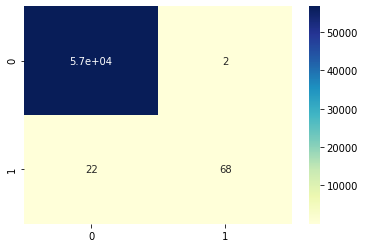

In [56]:
print("Confusion Matrix on Test Data Plot")
sns.heatmap(pd.DataFrame(cnf), annot=True, cmap='YlGnBu')